# RandomForestRegressor

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('GENERATION.csv')

del df['Day of Year']
del df['Year']
del df['Month']
del df['Day']
del df['Is Daylight']
del df['First Hour of Period']

df.head()

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [24]:
df=df.dropna()

In [25]:
df.columns

Index(['Distance to Solar Noon', 'Average Temperature (Day)',
       'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover',
       'Visibility', 'Relative Humidity', 'Average Wind Speed (Period)',
       'Average Barometric Pressure (Period)', 'Power Generated'],
      dtype='object')

In [26]:
 df.rename(columns={'Distance to Solar Noon': 'Distance_to_Solar_Noon','Average Temperature (Day)':'Average_Temperature_Day','Average Wind Direction (Day)':'Average_Wind_Direction_Day',
                   'Average Wind Speed (Day)':'Average_Wind_Speed_Day','Sky Cover':'Sky_Cover','Relative Humidity':'Relative_Humidity',
                   'Average Wind Speed (Period)':'Average_Wind_Speed_Period','Average Barometric Pressure (Period)':'Average_Barometric_Pressure_Period','Power Generated':'Power_Generated'}, inplace=True)

In [27]:
df.columns

Index(['Distance_to_Solar_Noon', 'Average_Temperature_Day',
       'Average_Wind_Direction_Day', 'Average_Wind_Speed_Day', 'Sky_Cover',
       'Visibility', 'Relative_Humidity', 'Average_Wind_Speed_Period',
       'Average_Barometric_Pressure_Period', 'Power_Generated'],
      dtype='object')

In [28]:
x = df.drop(labels='Power_Generated', axis=1)
y = df.loc[:,'Power_Generated']

In [29]:
x

,Distance_to_Solar_Noon,Average_Temperature_Day,Average_Wind_Direction_Day,Average_Wind_Speed_Day,Sky_Cover,Visibility,Relative_Humidity,Average_Wind_Speed_Period,Average_Barometric_Pressure_Period
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89
...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  2043
NUMBER OF TEST DATASET      :  876
TOTAL NUMBER OF DATASET    :  2919


In [31]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  2043
NUMBER OF TEST DATASET      :  876
TOTAL NUMBER OF DATASET    :  2919


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
predicted = RFR.predict(x_test)

In [35]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predicted)
print("THE R2 SCORE OF RandomForestRegressor IS :",R2*100)

THE R2 SCORE OF RandomForestRegressor IS : 90.59663126100162


In [36]:
from sklearn.metrics import rand_score
RAND = rand_score(y_test,predicted)
print("THE ACCURACY SCORE OF RandomForestRegressor IS :",RAND*100)

THE ACCURACY SCORE OF RandomForestRegressor IS : 90.94220482713634


In [37]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test,predicted)
print("THE EXPLAINED VARIENCE SCORE OF RandomForestRegressor IS :",EVS)

THE EXPLAINED VARIENCE SCORE OF RandomForestRegressor IS : 0.905969662860044


In [38]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predicted)
print("THE MEAN SQUARED ERROR SCORE OF RandomForestRegressor IS :",MSE)

THE MEAN SQUARED ERROR SCORE OF RandomForestRegressor IS : 9904290.44486096


In [39]:
from sklearn.metrics import median_absolute_error
MAE = median_absolute_error(y_test,predicted)
print("THE MEAN ABSOLUTE ERROR SCORE OF RandomForestRegressor IS :",MAE)

THE MEAN ABSOLUTE ERROR SCORE OF RandomForestRegressor IS : 226.7100000000005


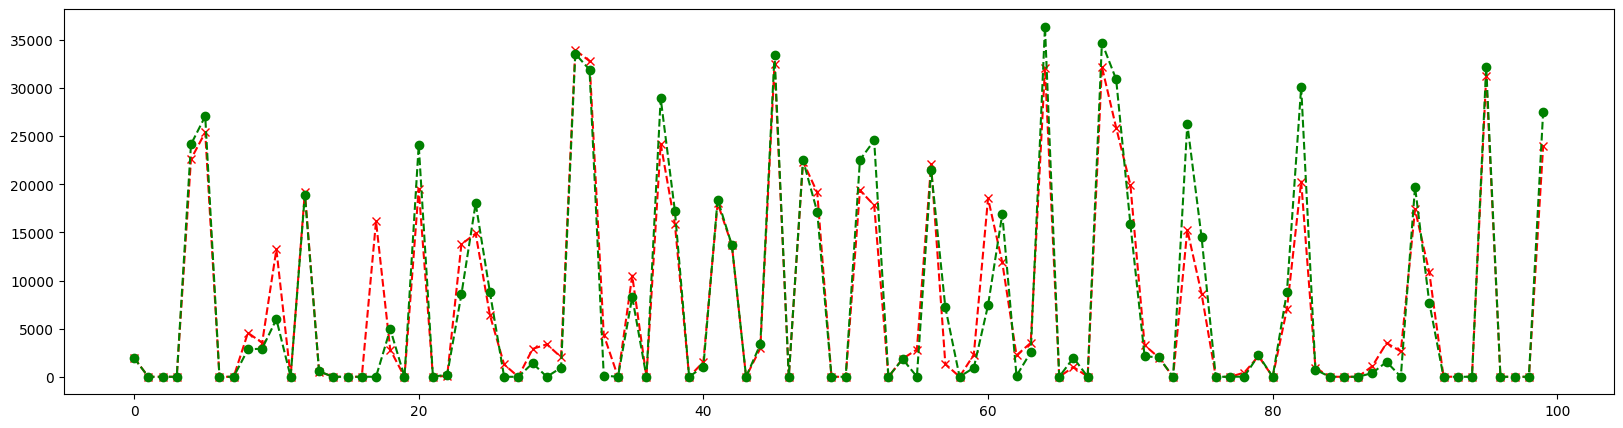

In [40]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [41]:
import joblib
joblib.dump(RFR, 'GENERATION2.pkl')

['GENERATION2.pkl']